In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

R2 score: 0.9999999999999107


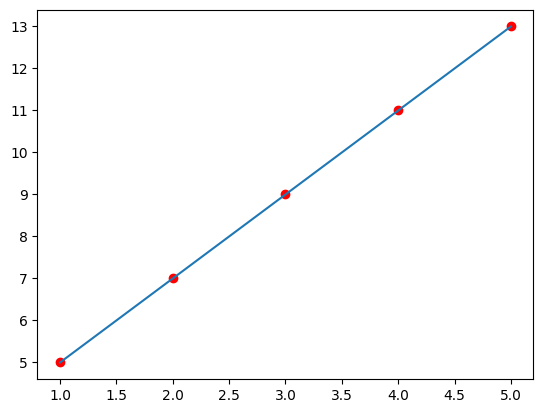

In [178]:
def mean(x):
    return(sum(x)/len(x))
def least_squared(x , y):
    q0 = 1
    q1 = 1
    a = 0.08
    it = 1000
    for i in range(it):
        y_predicted = q0 + q1 * x
        q1 = q1 + a*(1/len(x))*(sum(x*(y-y_predicted)))
        q0 = q0 + a*(1/len(x))*(sum(y-y_predicted))
    plt.plot(x,y_predicted)
    sst = sum([i*i for i in (y-mean(y))])
    ssr = sum([(y[i]-y_predicted[i])**2 for i in range(len(y))])
    print("R2 score:", 1-ssr/sst)
x = np.array([1,2,3,4,5])
y= np.array([5,7,9,11,13])
least_squared(x ,y )
plt.scatter(x,y,c='red')

In [205]:
df = pd.read_csv("/home/captaint/Downloads/ds/diabetes.csv")
x = np.array(df.iloc[:,0:8])
y = df['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y):
    n_samples, n_features = X.shape
    thetam = np.zeros(n_features)
    bias = 0
    a = 0.001
    iterations = 500
    for i in range(iterations):
        xtheta = np.dot(X, thetam) + bias
        y_predicted = sigmoid(xtheta)

        dxtheta = (1/n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1/n_samples) * np.sum(y_predicted - y)

        thetam = thetam - a*dxtheta
        bias = bias - a*db
    return thetam,bias
    
def predict(X,y,thetam, bias):
    linear_model = np.dot(X, thetam) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    print(y_predicted_cls)
    count = 0
    for i in range(len(y_predicted_cls)):
        if(y_predicted_cls[i] == np.array(y)[i]):
            count+=1
    print(count, len(y))
thetam,bias = gradient_descent(xtrain,ytrain)
predict(xtest,ytest,thetam,bias)

[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
95 154
